# 因子挖掘与回测示例  
author: 徐灵笑

In [1]:
from utils import get_all_data_files, DEFAULT_OPEN_TIME, DEFAULT_CLOSE_TIME

import pandas as pd 
import numpy as np 
from typing import List
from tqdm import tqdm
import datetime
import itertools
import matplotlib.pyplot as plt 


In [2]:
start_date = '20220702'
end_date = '20220730'

In [3]:
# Get the data files needed

data_dir = './data'

fn_lst = get_all_data_files(data_dir, start_date, end_date)
fn_lst

['./data/20220704_AllSymbols_1min.parquet',
 './data/20220705_AllSymbols_1min.parquet',
 './data/20220706_AllSymbols_1min.parquet',
 './data/20220707_AllSymbols_1min.parquet',
 './data/20220708_AllSymbols_1min.parquet',
 './data/20220711_AllSymbols_1min.parquet',
 './data/20220712_AllSymbols_1min.parquet',
 './data/20220713_AllSymbols_1min.parquet',
 './data/20220714_AllSymbols_1min.parquet',
 './data/20220715_AllSymbols_1min.parquet',
 './data/20220718_AllSymbols_1min.parquet',
 './data/20220719_AllSymbols_1min.parquet',
 './data/20220720_AllSymbols_1min.parquet',
 './data/20220721_AllSymbols_1min.parquet',
 './data/20220722_AllSymbols_1min.parquet',
 './data/20220725_AllSymbols_1min.parquet',
 './data/20220726_AllSymbols_1min.parquet',
 './data/20220727_AllSymbols_1min.parquet',
 './data/20220728_AllSymbols_1min.parquet',
 './data/20220729_AllSymbols_1min.parquet']

In [4]:
CONFIG_DF = pd.read_csv('./AShareEODPrices.csv')
CONFIG_DF

,object_id,s_info_windcode,trade_dt,crncy_code,s_dq_preclose,s_dq_open,s_dq_high,s_dq_low,s_dq_close,s_dq_change,...,s_dq_adjlow,s_dq_adjclose,s_dq_adjfactor,s_dq_avgprice,s_dq_tradestatus,s_dq_tradestatuscode,s_dq_limit,s_dq_stopping,opdate,opmode
0,{000003F7-AEE3-4309-AC0E-2C9D6D22494B},600227.SH,20160615,CNY,5.74,5.71,5.92,5.67,5.84,0.10,...,32.60,33.58,5.749919,5.8252,交易,-1.0,6.31,5.17,2016-06-15 15:12:24,0
1,{000005E9-A909-46EB-A46B-CFA2192AEF95},000657.SZ,20160304,CNY,15.29,15.87,16.82,14.93,16.50,1.21,...,45.23,49.99,3.029434,16.1107,交易,-1.0,16.82,13.76,2016-03-04 15:09:32,0
2,{00001632-39F0-4A9E-B7E8-DAB308EF372F},830964.BJ,20220525,CNY,3.70,3.66,3.73,3.66,3.71,0.01,...,7.72,7.83,2.110356,3.6843,交易,-1.0,4.81,2.59,2022-05-25 15:31:15,0
3,{00001A60-6BB2-4D85-8A72-36EA008D03C9},300411.SZ,20150209,CNY,30.50,30.26,31.16,29.95,30.22,-0.28,...,29.95,30.22,1.000000,30.4833,交易,-1.0,33.55,27.45,2015-02-09 15:06:29,0
4,{00002117-6526-4458-9071-3C2CEC8F4AB9},002070.SZ,20161019,CNY,18.88,18.80,18.86,18.52,18.56,-0.32,...,86.68,86.87,4.680559,18.6274,交易,-1.0,20.77,16.99,2016-10-19 15:09:11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6892461,{FFFFEBF6-0D51-4E56-B86B-2E596DB90E14},000537.SZ,20151223,CNY,10.96,10.97,11.35,10.80,11.28,0.32,...,62.19,64.96,5.758654,11.1050,交易,-1.0,12.06,9.86,2015-12-23 15:09:52,0
6892462,{FFFFEC79-DD22-45A1-ACF3-F1A8D326F0D0},002398.SZ,20150302,CNY,17.41,17.48,17.85,17.38,17.64,0.23,...,39.06,39.64,2.247333,17.6190,交易,-1.0,19.15,15.67,2015-03-02 15:06:27,0
6892463,{FFFFF7A7-111A-412B-8D4E-C7D79D426098},600221.SH,20160323,CNY,3.21,3.20,3.23,3.18,3.22,0.01,...,9.99,10.11,3.141151,3.2029,交易,-1.0,3.53,2.89,2016-03-23 15:12:18,0
6892464,{FFFFF9FE-6D28-4A19-BAF4-0266E035C0E2},002476.SZ,20150601,CNY,7.99,7.99,7.99,7.99,7.99,0.00,...,41.33,41.33,5.172488,7.9900,停牌,0.0,NaN,NaN,2015-06-01 15:08:10,0


由于内存限制，我们一般不把所有数据一次性读取到内存中，而是一天天读取和计算因子值，感兴趣的同学可以尝试把这一步用多进程加速，此sample为了清晰起见不提供multiprocessing的代码   
由于A股市场T+1机制的限制，大多数因子预测的目标为隔日的return：如D日因子预测的是D+1日收盘价/D日收盘价（日频因子），或D日T时刻因子预测的是D+1日T时刻Close/D日T时刻Close（高频因子）
所以我们在确定D日股票池的时候需要用到D+1日哪些股票是正常交易的

In [5]:
def read_data(path:str) -> pd.DataFrame:
    """Read Data from the parquet file and formulate it into a multi-index dataframe"""
    df = pd.read_parquet(path)
    df['datetime'] = pd.to_datetime(df['datetime'])
    df = df.sort_values(['symbol', 'datetime'])
    date_time = df['datetime'].iloc[0].normalize()
    df = df.set_index(['symbol', 'datetime'])
    # df = df.sort_index(axis=0, level='datetime')
    open_time = date_time + pd.to_timedelta(DEFAULT_OPEN_TIME)
    close_time = date_time + pd.to_timedelta(DEFAULT_CLOSE_TIME)
    df = df.loc[
        ( df.index.get_level_values('datetime') >= open_time ) & ( df.index.get_level_values('datetime') <= close_time )
        ]
    return df

def get_date_trade_symbols(date:int) -> pd.Series:
    symbols = CONFIG_DF.loc[
        ( CONFIG_DF['trade_dt'] == date ) & ( CONFIG_DF['s_dq_tradestatus'] == '交易' )
        ]['s_info_windcode']
    return symbols

def get_adj_factor(date:int, symbol:pd.Series) -> pd.Series:
    adj_factors = CONFIG_DF.loc[
        ( CONFIG_DF['trade_dt'] == date ) & ( CONFIG_DF['s_info_windcode'].isin(symbol) )
    ][['s_dq_adjfactor', 's_info_windcode']]
    adj_factors.columns = ['adj_factor', 'symbol']
    adj_factors = adj_factors.set_index('symbol')
    return adj_factors

def filter_trade_symbols(df:pd.DataFrame, symbols:pd.Series) -> pd.DataFrame:
    return df.loc[df.index.get_level_values('symbol').isin(symbols)]

这些函数定义如何计算预测的目标，此sample将用分钟级Kline生成日频因子，所以预测的目标位D+1日收盘价/D日收盘价

In [6]:
def get_close(df:pd.DataFrame, adj_factor) -> pd.DataFrame:
    close = df.groupby(level=0).last()[['close']]
    concat_df = pd.concat([close, adj_factor], axis=1).dropna()
    adj_close = concat_df['close'] * concat_df['adj_factor']
    return pd.DataFrame(adj_close, columns=['adj_close'])

def calc_target_return(today_df:pd.DataFrame, today_adj:pd.DataFrame, tomorrow_df:pd.DataFrame, tomorrow_adj:pd.DataFrame) -> pd.DataFrame:
    today_close = get_close(today_df, today_adj)
    today_close.columns = ['today_adj_close']
    tomorrow_close = get_close(tomorrow_df, tomorrow_adj)
    tomorrow_close.columns = ['tomorrow_adj_close']
    concat_df = pd.concat([today_close, tomorrow_close], axis=1).dropna()
    target_return = concat_df['tomorrow_adj_close'] / concat_df['today_adj_close']
    return pd.DataFrame(target_return, columns=['target_return'])
    

这里定义因子的表达式，此sample只简单计算D日价格与成交量的correlation作为因子，同样的，这里的groupby一步也可以用并行加速，在之后的因子开发框架中我会提供并行加速后的groupby.apply和apply的接口

In [7]:
def myFactor(df):
    close_volume = df[['close', 'volume']].dropna()
    return close_volume.corr().iloc[0,1]

In [8]:
file_iter = list(zip(fn_lst[:-1], fn_lst[1:]))

factor_lst = []
target_lst = []

for fn_1, fn_2 in tqdm(file_iter):
    test_df_1 = read_data(fn_1)
    test_df_2 = read_data(fn_2)
    date1 = os.path.split(fn_1)[-1].split('_')[0]
    date2 = os.path.split(fn_2)[-1].split('_')[0]
    symbols = get_date_trade_symbols(int(date2))
    test_df_1 = filter_trade_symbols(test_df_1, symbols)
    test_df_2 = filter_trade_symbols(test_df_2, symbols)

    assert len(test_df_1.index.get_level_values('symbol')) == len(test_df_2.index.get_level_values('symbol'))

    adj_close_1 = get_adj_factor(int(date1), symbols)
    adj_close_2 = get_adj_factor(int(date2), symbols)

    target_return = calc_target_return(test_df_1, adj_close_1, test_df_2, adj_close_2)

    assert len(list(set(test_df_1.index.get_level_values('symbol')))) == len(list(set(test_df_2.index.get_level_values('symbol')))) == len(target_return)

    factor = test_df_1.groupby(level=0).apply(myFactor)
    factor = pd.DataFrame(factor, columns=[date2])
    target_return.columns = [date2]
    factor_lst.append(factor)
    target_lst.append(target_return)

100%|██████████| 19/19 [06:06<00:00, 19.32s/it]


In [9]:
target_df = pd.concat(target_lst, axis=1, join='outer')
factor_df = pd.concat(factor_lst, axis=1, join='outer')


之后就是跑个回测，这里示范十分组回测的过程

In [10]:
factor_df.T.stack()

          symbol   
20220705  000001.SZ    0.066952
          000002.SZ   -0.115888
          000006.SZ    0.019189
          000007.SZ    0.049736
          000008.SZ   -0.095048
                         ...   
20220729  688375.SH   -0.000758
          001336.SZ   -0.264539
          688382.SH    0.033185
          301306.SZ    0.005534
          688253.SH   -0.300675
Length: 88736, dtype: float64

In [11]:
num_groups = 5

def split_groups(series: pd.Series):
    group = pd.Series(np.zeros(series.shape[0]))
    interval = 1 / num_groups
    for i in range(num_groups):
        lower = series.quantile(interval * i)
        upper = series.quantile(interval * (i+1))
        group[(series.values>=lower)&(series.values<upper)] = i+1

    group.index = series.index
    group = group.replace(0,np.nan)

    return group

def set_groups(factor, num_groups):

    # def apply_parrallel(groups, func):
    #     group_list = Parallel(n_jobs=multiprocessing.cpu_count())(delayed(func)(g, num_groups) for name,g in groups)
    #     return pd.concat(group_list)

    # groups = apply_parrallel(factor.T.stack().groupby(level=0), split_groups).unstack().T
    groups = factor.T.stack().groupby(level=0).apply(split_groups).unstack().T

    return groups


group_df = set_groups(factor_df, num_groups)
group_df

,20220705,20220706,20220707,20220708,20220711,20220712,20220713,20220714,20220715,20220718,20220719,20220720,20220721,20220722,20220725,20220726,20220727,20220728,20220729
symbol,,,,,,,,,,,,,,,,,,,
000001.SZ,4.0,3.0,5.0,2.0,1.0,3.0,5.0,5.0,2.0,4.0,1.0,4.0,4.0,NaN,2.0,4.0,1.0,1.0,3.0
000002.SZ,2.0,3.0,4.0,4.0,2.0,4.0,5.0,5.0,4.0,5.0,1.0,3.0,3.0,4.0,5.0,5.0,2.0,1.0,4.0
000004.SZ,NaN,5.0,4.0,4.0,5.0,NaN,1.0,3.0,4.0,5.0,1.0,5.0,4.0,5.0,1.0,1.0,5.0,3.0,1.0
000005.SZ,NaN,1.0,1.0,3.0,1.0,1.0,1.0,3.0,4.0,5.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,5.0,1.0
000006.SZ,3.0,3.0,4.0,5.0,2.0,2.0,3.0,5.0,3.0,3.0,1.0,2.0,2.0,3.0,1.0,2.0,3.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688798.SH,5.0,2.0,5.0,2.0,2.0,2.0,3.0,3.0,3.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0
688799.SH,3.0,1.0,2.0,2.0,2.0,4.0,2.0,2.0,4.0,2.0,5.0,2.0,4.0,3.0,2.0,4.0,2.0,1.0,5.0
688800.SH,1.0,2.0,1.0,2.0,5.0,2.0,4.0,3.0,2.0,3.0,4.0,2.0,2.0,1.0,1.0,5.0,5.0,3.0,2.0


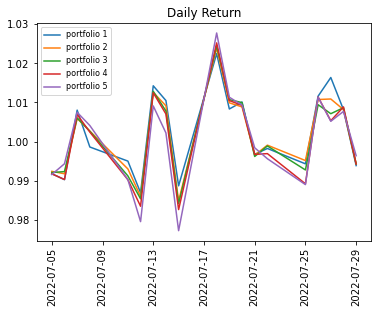

In [12]:

def calc_group_return(series: pd.Series, groups):
    date = series.index.get_level_values(0)[0]
    group = groups.get_group(date)
    group_return = series.groupby(group).mean()
    return group_return

def get_group_return(group_df, ret):
    ret_2 = ret.T.shift(-1).T
    joint_cols = list(set(group_df.columns) & set(ret_2.columns))
    group_df_2 = group_df[joint_cols]
    ret_2 = ret[joint_cols]
    group_return = ret_2.T.stack().groupby(level=0).apply(calc_group_return, groups=group_df.T.stack().groupby(level=0)).unstack().T
    return group_return

def plot_return(group_return, num_groups, start, end, title, if_long_short=True, save=False):
    selected_period = (pd.to_datetime(group_return.columns) >= start) & (pd.to_datetime(group_return.columns) < end)

    # if you want to plot figures by matplotlib
    plt.rcParams['figure.dpi'] = 1080
    for i in range(num_groups):
        plt.plot(pd.to_datetime(group_return.columns)[selected_period],group_return.iloc[i,:].loc[selected_period])
    plt.legend(['portfolio ' + str(i+1) for i in range(num_groups)],prop={'size':8},loc = 'upper left')
    plt.title(title)
    plt.xticks(rotation=90)
    plt.show()
    return

group_return = get_group_return(group_df, target_df)
start = pd.to_datetime(start_date)
end = pd.to_datetime(end_date)
plot_return(group_return, num_groups, start, end, title='Daily Return')